<a href="https://colab.research.google.com/github/Kritika1209/Kritika1209/blob/main/Facebook_Live_Sellers_in_Thailand_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importing dataset
dataset= pd.read_csv("Facebook_Marketplace_data.csv")
#need to split col 3- time and date of post
new_ds=dataset['status_published'].str.split(" ", expand=True)
dataset['Column1']=new_ds[0]
dataset['Column2']=new_ds[1]
dataset.rename(columns= {'Column1': 'Date of Post', 'Column2': 'Time of Post'}, inplace=True)
dataset.drop(columns=['status_published'], inplace=True)
#defining the dependent variables and rearranging the columns
x=dataset.iloc[:, [0,1,11,12]].values


In [ ]:
#correlation between time of post and number of reactions
x1=x[:,3]
print(x1)
#converting time into a numeric value
def time_to_minutes(time_str):
    hours, minutes = map(int, time_str.split(':'))
    return hours * 60 + minutes

x1_numeric = np.array([time_to_minutes(t) for t in x1])
dataset['Column3']=x1_numeric
dataset.rename(columns= {'Column3': 'Time of Post (in minutes)'}, inplace=True)
dataset.drop(columns=['Time of Post'], inplace=True)
x=dataset.iloc[:, [0,1,11,12]].values
print(x[:,3])

['6:00' '22:45' '6:17' ... '23:03' '0:43' '10:30']
[360 1365 377 ... 1383 43 630]


In [ ]:
y=dataset.iloc[:, 2].values
print(y)

[529 150 227 ...   2 351  17]


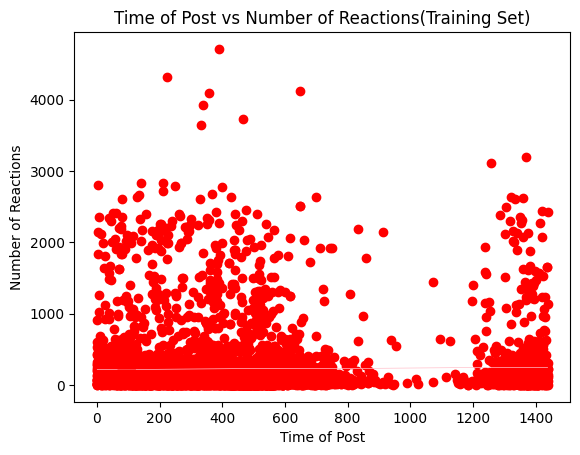

In [ ]:
#Splitting dataset in Training set and Test Set
from sklearn.model_selection import train_test_split
#creating 4 vairables-
x_train, x_test, y_train, y_test= train_test_split(x[:,3].reshape(-1,1),y, test_size= 0.25, random_state=1)
#Training the model
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train, y_train)
#Predicting the Test set results
y_pred= regressor.predict(x_test)

plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, regressor.predict(x_train), color='pink', linewidth=0.25)


plt.title('Time of Post vs Number of Reactions(Training Set)')
plt.xlabel('Time of Post')
plt.ylabel('Number of Reactions')
plt.show()





In [ ]:
#correlation between reactions and other metrics
x2= dataset.iloc[:,[3,4,5,6,7,8,9,10]].values
#imputing for missing values
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(missing_values=np.nan, strategy= 'mean')
imputer.fit(x2)
x2= imputer.transform(x2)

#creating 4 vairables-
from sklearn.model_selection import train_test_split
x2_train, x2_test, y1_train, y1_test= train_test_split(x2,y, test_size= 0.25, random_state=1)
#Training the model
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x2_train, y1_train)
#Predicting the Test set results
y_pred= regressor.predict(x2_test)

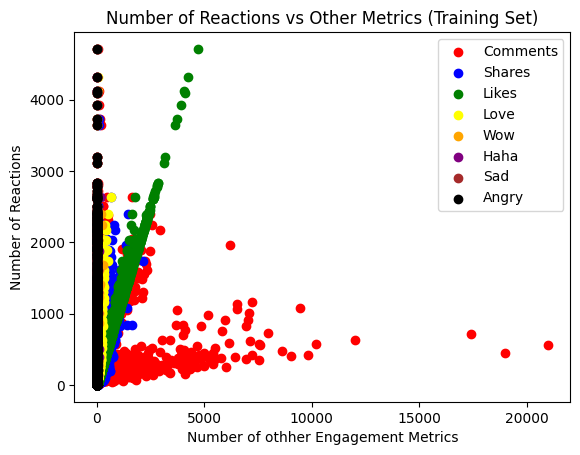

In [ ]:
plt.scatter(x2_train[:,0], y1_train, color='red', label="Comments")
plt.scatter(x2_train[:,1], y1_train, color='blue', label="Shares")
plt.scatter(x2_train[:,2], y1_train, color='green', label="Likes")
plt.scatter(x2_train[:,3], y1_train, c='yellow', label="Love")
plt.scatter(x2_train[:,4], y1_train, color='orange', label="Wow")
plt.scatter(x2_train[:,5], y1_train, color='purple', label="Haha")
plt.scatter(x2_train[:,6], y1_train, color='brown', label="Sad")
plt.scatter(x2_train[:,7], y1_train, color='black', label="Angry")
plt.legend()
plt.title('Number of Reactions vs Other Metrics (Training Set)')
plt.xlabel('Number of othher Engagement Metrics')
plt.ylabel('Number of Reactions')
plt.show()

In [51]:
#training the dataset on Kmeans model
x_2= dataset.iloc[:,[1, 2,3,4,5,6,7]].values
#encoding the status type

from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
x_2[:,0]=le.fit_transform(x_2[:,0])


#normalising the values
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_2[:, 1:]= sc.fit_transform(x_2[:, 1:])



In [40]:
#plotting for reactions vs comments based on status_type
reacn_comm=x_2[:, [1,2]]
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=4, init= "k-means++", random_state= 42)
y_kmeans= kmeans.fit_predict(reacn_comm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


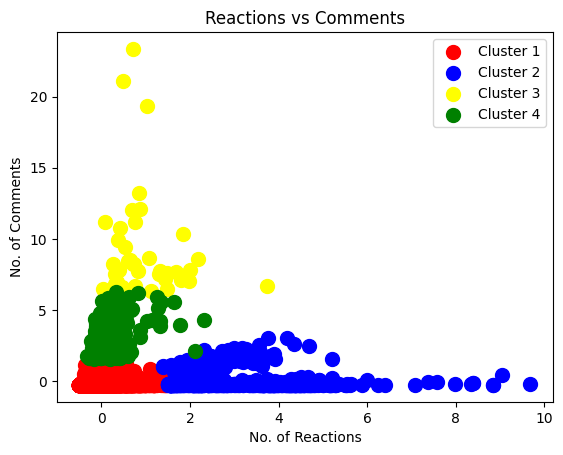

In [41]:
#visualising the clusters
plt.scatter(reacn_comm[y_kmeans==0,0], reacn_comm[y_kmeans==0,1], s=100, c='red', label= 'Cluster 1')
plt.scatter(reacn_comm[y_kmeans==1,0], reacn_comm[y_kmeans==1,1], s=100, c='blue', label= 'Cluster 2')
plt.scatter(reacn_comm[y_kmeans==2,0], reacn_comm[y_kmeans==2,1], s=100, c='yellow', label= 'Cluster 3')
plt.scatter(reacn_comm[y_kmeans==3,0], reacn_comm[y_kmeans==3,1], s=100, c='green', label= 'Cluster 4')
plt.title("Reactions vs Comments")
plt.xlabel("No. of Reactions")
plt.ylabel("No. of Comments")
plt.legend()
plt.show()

In [44]:
#plotting for reactions vs shares based on status_type
reacn_share=x_2[:, [1,3]]
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=4, init= "k-means++", random_state= 42)
y_kmeans= kmeans.fit_predict(reacn_share)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


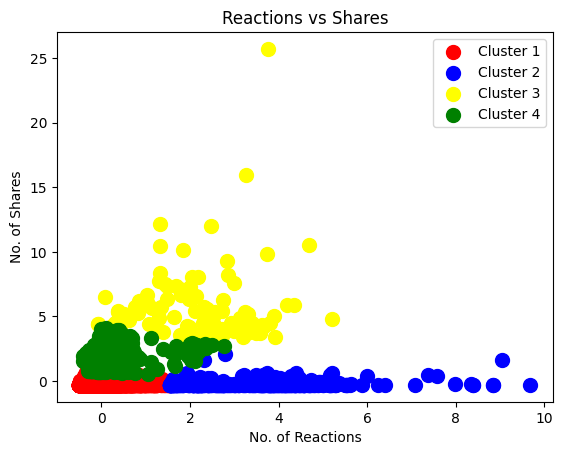

In [45]:
#visualising the clusters
plt.scatter(reacn_share[y_kmeans==0,0], reacn_share[y_kmeans==0,1], s=100, c='red', label= 'Cluster 1')
plt.scatter(reacn_share[y_kmeans==1,0], reacn_share[y_kmeans==1,1], s=100, c='blue', label= 'Cluster 2')
plt.scatter(reacn_share[y_kmeans==2,0], reacn_share[y_kmeans==2,1], s=100, c='yellow', label= 'Cluster 3')
plt.scatter(reacn_share[y_kmeans==3,0], reacn_share[y_kmeans==3,1], s=100, c='green', label= 'Cluster 4')
plt.title("Reactions vs Shares")
plt.xlabel("No. of Reactions")
plt.ylabel("No. of Shares")
plt.legend()
plt.show()

In [46]:
#plotting for reactions vs likes based on status_type
reacn_like=x_2[:, [1,4]]
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=4, init= "k-means++", random_state= 42)
y_kmeans= kmeans.fit_predict(reacn_like)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


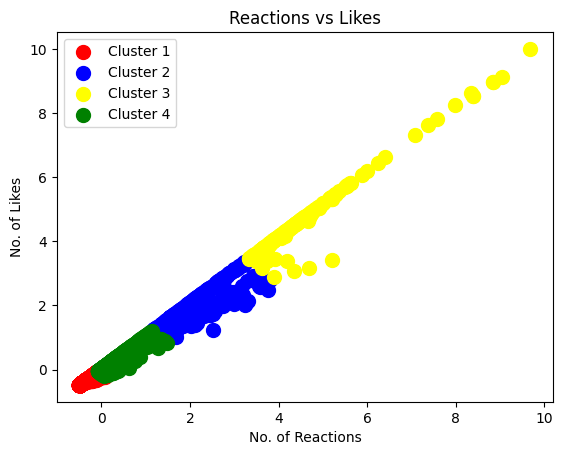

In [47]:
#visualising the clusters
plt.scatter(reacn_like[y_kmeans==0,0], reacn_like[y_kmeans==0,1], s=100, c='red', label= 'Cluster 1')
plt.scatter(reacn_like[y_kmeans==1,0], reacn_like[y_kmeans==1,1], s=100, c='blue', label= 'Cluster 2')
plt.scatter(reacn_like[y_kmeans==2,0], reacn_like[y_kmeans==2,1], s=100, c='yellow', label= 'Cluster 3')
plt.scatter(reacn_like[y_kmeans==3,0], reacn_like[y_kmeans==3,1], s=100, c='green', label= 'Cluster 4')
plt.title("Reactions vs Likes")
plt.xlabel("No. of Reactions")
plt.ylabel("No. of Likes")
plt.legend()
plt.show()

Similarly, we would plot for Reactions vs other metrics

In [52]:
#using elbow method to find optimal value of K
wcss= []
for i in range (1,11):
  kmeans= KMeans(n_clusters=i, init= "k-means++", random_state= 42)
  #fit function
  kmeans.fit(x_2)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

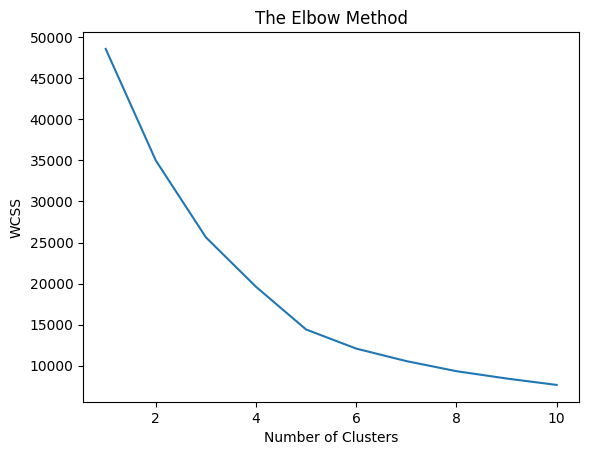

In [53]:
#visualisation of the elbow curve
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

Optimal No. of Clusters According to Elbow method is 5

In [ ]:
#count for different types of posts
x4= dataset.iloc[:,1].values
count_video=0
count_photos=0
count_link=0
count_status=0
for post in x4:
  if post=="photo":
    count_photos+=1
  elif post=="status":
    count_status+=1
  elif post=="video":
    count_video+=1
  elif post=="link":
    count_link+=1
print(f"Video= {count_video}\nPhotos= {count_photos}\nLinks= {count_link}\nStatus= {count_status}")


Video= 2334
Photos= 4288
Links= 63
Status= 365


In [ ]:
x5= dataset.iloc[:,[1,2,3,4]].values
avg_reactions=0
sum_reactions=0
avg_comments=0
sum_com=0
sum_shares=0
avg_shares=0
for element in x5:
  if element[0]=="photo":
    sum_reactions+=element[1]
    sum_com+=element[2]
    sum_shares+=element[3]

avg_reactions=sum_reactions/count_photos
avg_comments=sum_com/count_photos
avg_shares=sum_shares/count_photos

print(f"Average Reactions for photos={avg_reactions}\nAverage Comments for Photos={avg_comments}\nAverage Shares for Photos={avg_shares}")


Average Reactions for photos=181.29034514925374
Average Comments for Photos=15.993470149253731
Average Shares for Photos=2.5538712686567164


In [ ]:
#Repeating process for Videos, Links and Status
avg_comments=0
avg_reactions=0
avg_shares=0
sum_reactions=0
sum_com=0
sum_shares=0
for element in x5:
  if element[0]=="video":
    sum_reactions+=element[1]
    sum_com+=element[2]
    sum_shares+=element[3]

avg_reactions=sum_reactions/count_video
avg_comments=sum_com/count_video
avg_shares=sum_shares/count_video

print(f"Average Reactions for Videos={avg_reactions}\nAverage Comments for Videos={avg_comments}\nAverage Shares for Videos={avg_shares}")

avg_reactions=0
avg_comments=0
avg_shares=0
sum_com=0
sum_reactions=0
sum_shares=0
for element in x5:
  if element[0]=="link":
    sum_reactions+=element[1]
    sum_com+=element[2]
    sum_shares+=element[3]

avg_reactions=sum_reactions/count_link
avg_comments=sum_com/count_link
avg_shares=sum_shares/count_link

print(f"Average Reactions for Links={avg_reactions}\nAverage Comments for Links={avg_comments}\nAverage Shares for Links={avg_shares}")

avg_reactions=0
avg_comments=0
avg_shares=0
sum_com=0
sum_reactions=0
sum_shares=0
for element in x5:
  if element[0]=="status":
    sum_reactions+=element[1]
    sum_com+=element[2]
    sum_shares+=element[3]

avg_reactions=sum_reactions/count_status
avg_comments=sum_com/count_status
avg_shares=sum_shares/count_status

print(f"Average Reactions for Status={avg_reactions}\nAverage Comments for Status={avg_comments}\nAverage Shares for Status={avg_shares}")

Average Reactions for Videos=283.4095972579263
Average Comments for Videos=642.478149100257
Average Shares for Videos=115.67994858611826
Average Reactions for Links=370.14285714285717
Average Comments for Links=5.698412698412699
Average Shares for Links=4.396825396825397
Average Reactions for Status=438.78356164383564
Average Comments for Status=36.23835616438356
Average Shares for Status=2.558904109589041
